In [1]:
# IMPORT DATA

In [2]:
import os
print(os.getcwd())

d:\Personal Projects\Sales-Analysis


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
with open("sales_data_sample.csv", "rb") as f:
    raw_data = f.read()
    print(raw_data[:500])  # Print the first 500 bytes to check encoding

b'ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE\r\n10107,30,95.7,2,2871,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,,NYC,NY,10022,USA,NA,Yu,Kwai,Small\r\n10121,34,81.35,5,2765.9,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_16'


In [5]:
import chardet

with open("sales_data_sample.csv", "rb") as f:
    raw_data = f.read()
    result = chardet.detect(raw_data)
    print(result)  # Prints detected encoding


{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [6]:
sales = pd.read_csv("sales_data_sample.csv", encoding = "Windows-1252")

In [7]:
# DATA CLEANING AND PREPARATION

In [8]:
sales.shape

(2823, 25)

In [9]:
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [10]:
sales.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [11]:
sales.duplicated().sum()

np.int64(0)

In [12]:
sales.drop(columns="ADDRESSLINE2", inplace=True)

In [13]:
sales["STATE"].fillna("Unknown",inplace = True)
sales["POSTALCODE"].fillna("00000", inplace = True)
sales["TERRITORY"].fillna("Unkwown", inplace = True)

C:\Users\austi\AppData\Local\Temp\ipykernel_24084\861205107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales["STATE"].fillna("Unknown",inplace = True)
C:\Users\austi\AppData\Local\Temp\ipykernel_24084\861205107.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [14]:
sales.isna().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [15]:
sales.shape

(2823, 24)

In [16]:
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,Unkwown,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,Reims,Unknown,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,Unknown,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,Unkwown,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,6505551386,7734 Strong St.,San Francisco,CA,00000,USA,Unkwown,Brown,Julie,Medium


In [17]:
sales["CONTACTNAME"] = sales["CONTACTFIRSTNAME"] + " " + sales["CONTACTLASTNAME"]

In [18]:
sales["STATUS"].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [19]:
sales["YEAR_ID"].unique()

array([2003, 2004, 2005])

In [20]:
sales.drop(columns=["CONTACTFIRSTNAME", "CONTACTLASTNAME", "ADDRESSLINE1", "PHONE"], inplace=True)

In [27]:
sales.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE,CONTACTNAME
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,NYC,NY,10022,USA,Unkwown,Small,Kwai Yu
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,Reims,Unknown,51100,France,EMEA,Small,Paul Henriot
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,Paris,Unknown,75508,France,EMEA,Medium,Daniel Da Cunha
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,Pasadena,CA,90003,USA,Unkwown,Medium,Julie Young
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,CA,00000,USA,Unkwown,Medium,Julie Brown
5,10168,36,96.66,1,3479.76,2003-10-28,Shipped,4,10,2003,...,95,S10_1678,Technics Stores Inc.,Burlingame,CA,94217,USA,Unkwown,Medium,Juri Hirano
6,10180,29,86.13,9,2497.77,2003-11-11,Shipped,4,11,2003,...,95,S10_1678,Daedalus Designs Imports,Lille,Unknown,59000,France,EMEA,Small,Martine Rance
7,10188,48,100.00,1,5512.32,2003-11-18,Shipped,4,11,2003,...,95,S10_1678,Herkku Gifts,Bergen,Unknown,N 5804,Norway,EMEA,Medium,Veysel Oeztan
8,10201,22,98.57,2,2168.54,2003-12-01,Shipped,4,12,2003,...,95,S10_1678,Mini Wheels Co.,San Francisco,CA,00000,USA,Unkwown,Small,Julie Murphy
9,10211,41,100.00,14,4708.44,2004-01-15,Shipped,1,1,2004,...,95,S10_1678,Auto Canal Petit,Paris,Unknown,75016,France,EMEA,Medium,Dominique Perrier


In [26]:
sales["ORDERDATE"] = pd.to_datetime(sales["ORDERDATE"])

In [30]:
sales.dtypes

ORDERNUMBER                 int64
QUANTITYORDERED             int64
PRICEEACH                 float64
ORDERLINENUMBER             int64
SALES                     float64
ORDERDATE          datetime64[ns]
STATUS                     object
QTR_ID                      int64
MONTH_ID                    int64
YEAR_ID                     int64
PRODUCTLINE                object
MSRP                        int64
PRODUCTCODE                object
CUSTOMERNAME               object
CITY                       object
STATE                      object
POSTALCODE                 object
COUNTRY                    object
TERRITORY                  object
DEALSIZE                   object
CONTACTNAME                object
dtype: object

In [22]:
# EDA

In [36]:
# Set a clean visualization style
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))  # Default figure size

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

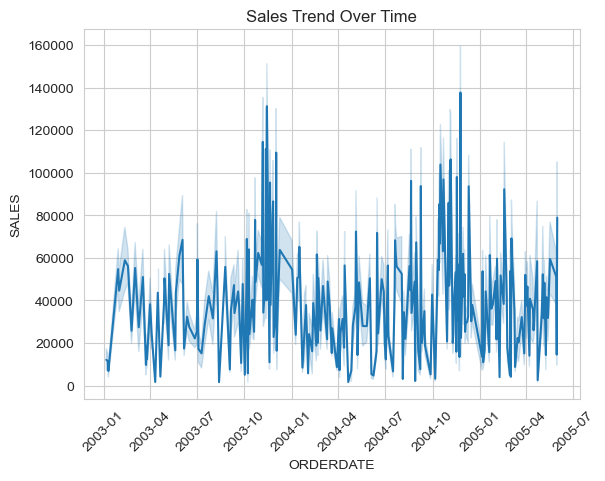

In [37]:
sns.lineplot(data=sales, x="ORDERDATE", y="SALES", estimator="sum")
plt.xticks(rotation=45)
plt.title("Sales Trend Over Time")
plt.show()

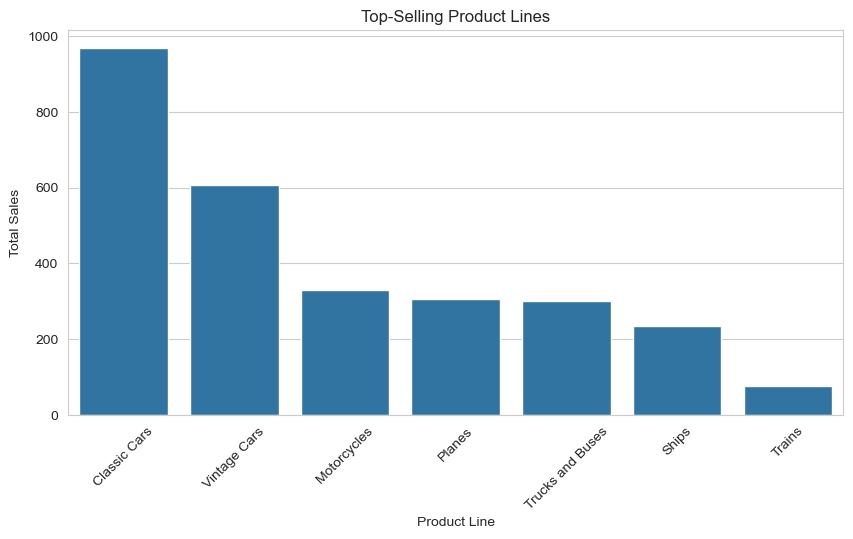

In [41]:
plt.figure(figsize=(10,5))

# Count sales by product line
product_counts = sales['PRODUCTLINE'].value_counts().reset_index()
product_counts.columns = ['PRODUCTLINE', 'COUNT']

# Plot
sns.barplot(data=product_counts, x='PRODUCTLINE', y='COUNT')
plt.xticks(rotation=45)
plt.title("Top-Selling Product Lines")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.show()

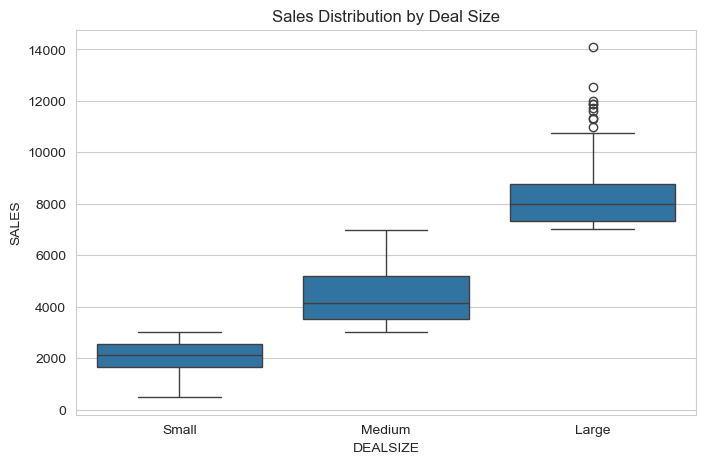

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot(data=sales, x="DEALSIZE", y="SALES")
plt.title("Sales Distribution by Deal Size")
plt.show()


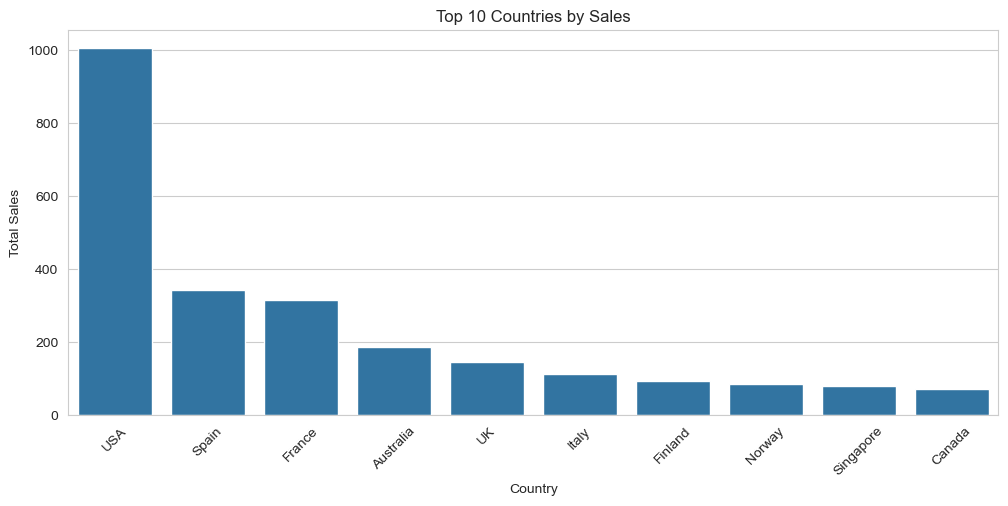

In [43]:
plt.figure(figsize=(12,5))
top_countries = sales['COUNTRY'].value_counts().head(10)  # Top 10 countries
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Sales")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.show()


C:\Users\austi\AppData\Local\Temp\ipykernel_24084\2984980038.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sales, x='STATUS', order=sales['STATUS'].value_counts().index, palette='coolwarm')


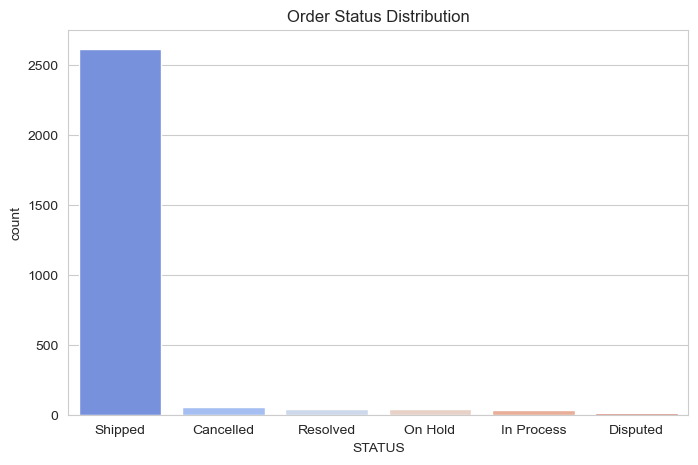

In [44]:
plt.figure(figsize=(8,5))
sns.countplot(data=sales, x='STATUS', order=sales['STATUS'].value_counts().index, palette='coolwarm')
plt.title("Order Status Distribution")
plt.show()


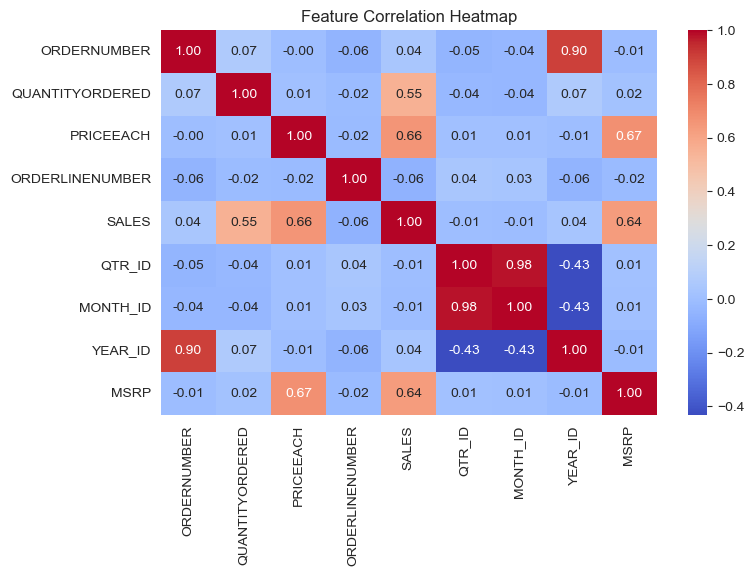

In [46]:
plt.figure(figsize=(8,5))

# Select only numeric columns
numeric_sales = sales.select_dtypes(include=['int64', 'float64'])

# Compute correlation on numeric data only
sns.heatmap(numeric_sales.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Feature Correlation Heatmap")
plt.show()

In [24]:
# ANALYSIS

In [48]:
# RFM ANALYSIS
# Define snapshot date (assume today for analysis)
snapshot_date = sales['ORDERDATE'].max()

# Compute RFM Metrics
rfm = sales.groupby('CUSTOMERNAME').agg({
    'ORDERDATE': lambda x: (snapshot_date - x.max()).days,  # Recency
    'ORDERNUMBER': 'count',  # Frequency (Total orders)
    'SALES': 'sum'  # Monetary (Total spend)
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Display first rows
print(rfm.head())


                         Recency  Frequency   Monetary
CUSTOMERNAME                                          
AV Stores, Co.               195         51  157807.81
Alpha Cognac                  64         20   70488.44
Amica Models & Co.           264         26   94117.26
Anna's Decorations, Ltd       83         46  153996.13
Atelier graphique            187          7   24179.96


In [49]:
# Assign scores using quantiles (1 to 5)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine RFM scores into a single RFM segment
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Display first rows
print(rfm.head())


                         Recency  Frequency   Monetary R_Score F_Score  \
CUSTOMERNAME                                                             
AV Stores, Co.               195         51  157807.81       3       5   
Alpha Cognac                  64         20   70488.44       4       2   
Amica Models & Co.           264         26   94117.26       1       3   
Anna's Decorations, Ltd       83         46  153996.13       4       5   
Atelier graphique            187          7   24179.96       3       1   

                        M_Score RFM_Segment  
CUSTOMERNAME                                 
AV Stores, Co.                5         355  
Alpha Cognac                  2         422  
Amica Models & Co.            3         133  
Anna's Decorations, Ltd       5         455  
Atelier graphique             1         311  


In [53]:
# Convert RFM scores to integers
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

# Define customer segments
def segment_customers(row):
    if row['R_Score'] >= 4 and row['F_Score'] >= 4:
        return 'VIP'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 3:
        return 'Loyal'
    elif row['R_Score'] >= 3 and row['F_Score'] <= 2:
        return 'Potential Loyalist'
    elif row['R_Score'] <= 2 and row['F_Score'] >= 3:
        return 'At Risk'
    else:
        return 'Lost Customers'

rfm['Customer_Segment'] = rfm.apply(segment_customers, axis=1)

# Count customers in each segment
customer_counts = rfm['Customer_Segment'].value_counts()
print(customer_counts)



Customer_Segment
VIP                   21
Lost Customers        19
At Risk               18
Potential Loyalist    18
Loyal                 16
Name: count, dtype: int64


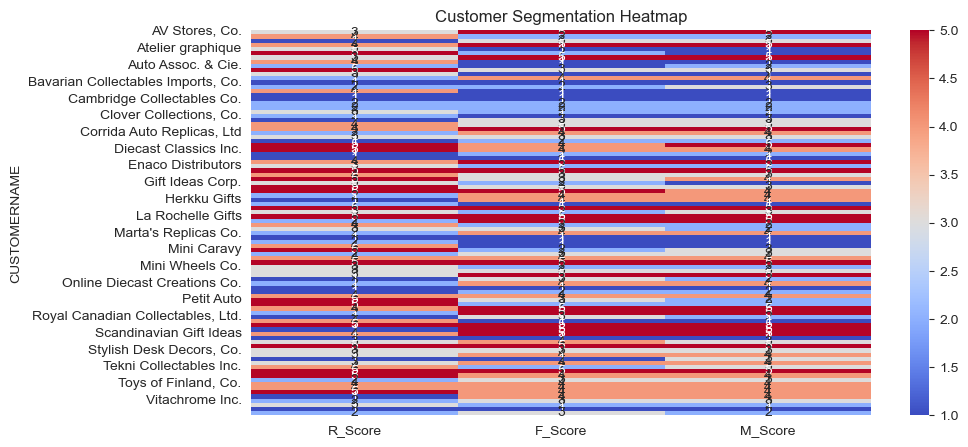

In [54]:

plt.figure(figsize=(10,5))
sns.heatmap(rfm[['R_Score', 'F_Score', 'M_Score']].astype(int), cmap='coolwarm', annot=True)
plt.title("Customer Segmentation Heatmap")
plt.show()

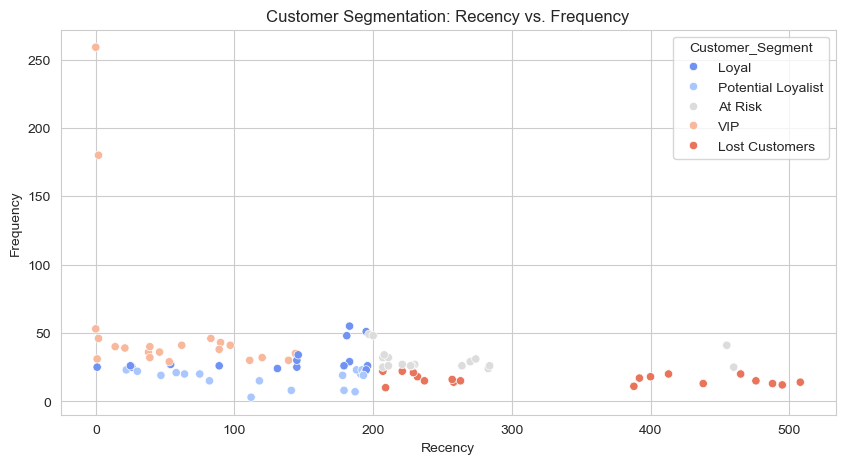

In [55]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Customer_Segment', palette='coolwarm')
plt.title("Customer Segmentation: Recency vs. Frequency")
plt.show()


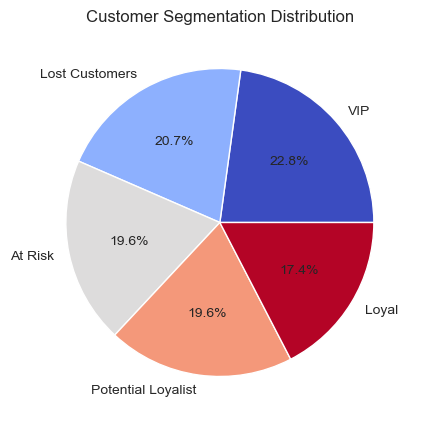

In [56]:
plt.figure(figsize=(8,5))
rfm['Customer_Segment'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='coolwarm')
plt.title("Customer Segmentation Distribution")
plt.ylabel("")
plt.show()


In [25]:
# REPORT AND INSIGHTS

# Sales Analysis & Customer Segmentation Report

## Executive Summary
This report presents an in-depth analysis of sales data, identifying key trends, best-selling products, and customer segmentation insights. The findings provide actionable recommendations for improving customer retention, increasing sales, and optimizing marketing strategies.

---

## **Sales Performance Analysis**

### **Sales Trend Over Time**
![Sales Trend Over Time](images/sales_trend.png)

- **Observations:**
  - Sales fluctuate significantly with **spikes during Q4** each year.
  - The highest peaks occur in **October and December**, likely due to holiday shopping.
  - A consistent sales pattern indicates **seasonal demand trends**.

- **Recommendations:**
  - Launch promotional campaigns during Q4 to **maximize revenue**.
  - Introduce **bundle deals** for holiday shopping.
  - Optimize inventory planning to **prepare for demand surges**.

---

### **Top-Selling Product Lines**
![Top-Selling Product Lines](images/top_products.png)

- **Observations:**
  - **Classic Cars** and **Vintage Cars** are the **best-selling product categories**.
  - **Trains have the lowest sales**, indicating low demand.
  - Other well-performing categories include **Motorcycles, Planes, and Trucks & Buses**.

- **Recommendations:**
  - Invest in **marketing for high-demand categories** (Classic & Vintage Cars).
  - Analyze why **Trains underperform**—is it pricing, availability, or lack of marketing?
  - **Cross-sell related products** (e.g., accessories for Classic Cars).

---

### **Sales Distribution by Deal Size**
![Sales Distribution by Deal Size](images/sales_by_dealsize.png)

- **Observations:**
  - **Large deal sizes contribute the highest revenue**, with higher variance.
  - **Small deals are more frequent but generate lower revenue**.
  - Medium-sized deals show **moderate consistency**.

- **Recommendations:**
  - Target large deal buyers with **premium offers & loyalty programs**.
  - Encourage small-deal customers to **upgrade with bundle discounts**.
  - **Monitor high-value sales trends** for better forecasting.

---

### **Top 10 Countries by Sales**
![Top 10 Countries by Sales](images/top_countries.png)

- **Observations:**
  - The **USA dominates sales**, generating the highest revenue.
  - Spain and France are the next strongest markets.
  - Countries like **Canada, Singapore, and Norway have lower sales**.

- **Recommendations:**
  - Expand marketing in **high-potential countries (Spain & France)**.
  - Identify **growth opportunities in underperforming regions**.
  - Consider **localized promotions and pricing strategies**.

---

### **Order Status Distribution**
![Order Status Distribution](images/order_status.png)

- **Observations:**
  - The majority of orders are **Shipped** (✅ positive business flow).
  - A small portion is **Cancelled, Resolved, On Hold, or Disputed**.
  - **Cancelled orders may indicate stock or payment issues**.

- **Recommendations:**
  - Investigate **cancellation reasons**—pricing, availability, or payment failures?
  - Improve **customer communication & order tracking** to reduce disputes.
  - Optimize **inventory management** to prevent delays.

---

## **Customer Segmentation (RFM Analysis)**

### ** RFM Segmentation Summary**
| Segment | Count | Percentage |
|---------|------:|------------|
| **VIPs** | 21 | 22.8% |
| **Lost Customers** | 19 | 20.7% |
| **At Risk** | 18 | 19.6% |
| **Potential Loyalists** | 18 | 19.6% |
| **Loyal Customers** | 16 | 17.4% |

- **Observations:**
  - **22.8% of customers are VIPs**, meaning they **spend frequently and recently**.
  - **20.7% of customers are lost**, requiring re-engagement.
  - A significant portion is **At Risk (19.6%)**, meaning they were frequent buyers but haven't purchased recently.

- **Recommendations:**
  - Offer **VIPs exclusive rewards & early access to promotions**.
  - Run a **"We Miss You" email campaign** for Lost Customers.
  - Provide **discounts to At-Risk customers** to prevent churn.

---

### **Customer Segmentation Heatmap**
![Customer Segmentation Heatmap](images/rfm_heatmap.png)

- **Observations:**
  - **VIPs have high scores across Recency, Frequency, and Monetary values.**
  - **Lost customers have low scores, indicating low engagement.**
  - **Potential Loyalists score well on Frequency but lower on Monetary.**

- **Recommendations:**
  - **Upsell & cross-sell to Potential Loyalists** to increase their spending.
  - **Engage At-Risk customers** before they transition to Lost.
  - **Personalize offers** based on customer scores.

---

### **Recency vs. Frequency Scatter Plot**
![Recency vs. Frequency](images/recency_vs_frequency.png)

- **Observations:**
  - **VIPs appear in the bottom right (recent, frequent buyers).**
  - **Lost Customers are in the top left (long time since last purchase, low frequency).**
  - **At-Risk customers are transitioning from frequent buyers to inactive.**

- **Recommendations:**
  - **Retarget Lost & At-Risk customers** with personalized promotions.
  - Offer **exclusive incentives for loyal and VIP customers**.
  - Use this segmentation to **improve targeted email marketing**.

---

## **Final Business Recommendations**
| **Customer Segment** | **Action Plan** |
|------------------|------------------|
| **VIPs (22.8%)** | Offer **exclusive loyalty programs & early access to promotions** to keep them engaged. |
| **Loyal Customers (17.4%)** | Encourage **repeat purchases** with special discounts or referral incentives. |
| **Potential Loyalists (19.6%)** | Offer **product recommendations & discounts** to increase spending. |
| **At Risk (19.6%)** | **Re-engage them** with personalized emails, exclusive discounts, or limited-time offers. |
| **Lost Customers (20.7%)** | Send **win-back promotions** (e.g., “We Miss You” emails with a discount). |

---